In [25]:
# Import basic packages for later use
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from typing import Union
import nibabel as nib
import SimpleITK as sitk
import pickle
from ipywidgets import widgets
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from IPython.display import display, clear_output

In [26]:
# install nnunet
# !pip install nnunet

In [27]:
# check if nnunet can be imported
import nnunet

###  Setting up nnU-Nets folder structure and environment variables
- nnUnet expects a certain folder structure and environment variables.

- Roughly they tell nnUnet:
  1. Where to look for stuff
  2. Where to put stuff

For more information about this please check: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/setting_up_paths.md

In [28]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input:
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder
    """
    if os.path.exists(folder_path):

        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)
    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

In [29]:
# Set environment Variables and creating folders
# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
# mount_dir = "/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/nnunet_utils"
mount_dir = "/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet"
path_dict = {
     "nnUNet_raw_data_base" : os.path.join(mount_dir, "nnUNet_raw"),
     "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"),
     "RESULTS_FOLDER" : os.path.join(mount_dir, "nnUNet_Results_Folder"),
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")

Current Working Directory /home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet
/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/nnUNet_raw exists.
/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/nnUNet_preprocessed exists.
/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/nnUNet_Results_Folder exists.
If No Error Occured Continue Forward. =)


## Data Preparation

In [17]:
# for prediction
# To handle the naming convension required by the model
# set the path to the folder containing the files
folder_path = '/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/input_folder'
# folder_path = '/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/trial_input/BraTS2021_00000'

# iterate over the files in the folder
for root, dirs, files in os.walk(folder_path):
    # check if the file name contains the search string
    for file in files:
      print(file)
      if "flair" in file:
          # replace the search string with the replace string
          new_filename = file.replace("flair", "0003")
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))
      if "t2" in file:
          # replace the search string with the replace string
          new_filename = file.replace("t2", "0002")
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))
      if "t1." in file:
          # replace the search string with the replace string
          new_filename = file.replace("t1.", "0000.")
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))
      if "t1ce" in file:
          # replace the search string with the replace string
          print(file)
          new_filename = file.replace("t1ce", "0001")
          print(file)
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))

      if  "seg" in file:
          # remove the segmentation (ground truth) if exists
          file_path = os.path.join(folder_path, file)
        #   os.remove(file_path)
          shutil.move(file_path, '/home/workstation04/GP_MMMAI/Notebooks')
        #   shutil.move(file_path, '/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/trial_seg')



BraTS2021_00000_seg.nii.gz
BraTS2021_00000_t1.nii.gz
BraTS2021_00000_flair.nii.gz
BraTS2021_00000_t1ce.nii.gz
BraTS2021_00000_t1ce.nii.gz
BraTS2021_00000_t1ce.nii.gz
BraTS2021_00000_t2.nii.gz


In [88]:
filename = os.listdir(folder_path)[0]
filename = os.path.splitext(filename)[0]
# filename = filename.rsplit('_', 1)[0]
print(filename)


ASH_00002


## Inference

In [15]:
!nnUNet_predict -h



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

usage: nnUNet_predict [-h] -i INPUT_FOLDER -o OUTPUT_FOLDER -t TASK_NAME
                      [-tr TRAINER_CLASS_NAME]
                      [-ctr CASCADE_TRAINER_CLASS_NAME] [-m MODEL]
                      [-p PLANS_IDENTIFIER] [-f FOLDS [FOLDS ...]] [-z]
                      [-l LOWRES_SEGMENTATIONS] [--part_id PART_ID]
                      [--num_parts NUM_PARTS]
                      [--num_threads_preprocessing NUM_THREADS_PREPROCESSING]
                      [--num_threads_nifti_save NUM_THREADS_NIFTI_SAVE]
                      [--disable_tta] [--overwrite_existing] [--mode MODE]
                      [--all_in_gpu ALL_

In [86]:
!nnUNet_predict -i "/home/workstation04/GP_MMMAI/Notebooks/input_folder"  -o "/home/workstation04/GP_MMMAI/Notebooks/input_folder" -t 501  -chk "Copy of model_latest" -m 3d_fullres --save_npz



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /home/workstation04/GP_MMMAI/MMMAI/InteractiveSegmentation/nnunet_util/nnUNet_Results_Folder/nnUNet/3d_fullres/Task501_BraTS2021/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 4 input modalities for each image
Found 1 unique case ids, here are some examples: ['ASH_00002']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 1
number of cases that still need to be predicted: 1
emptying cuda cache
loading parameters for folds, None
folds is None so we will automatically look for output folders (not using 'all'!)
found the following folds:

--------------------------------------------------------

### the next cell used to check the model performance on validation samples 

In [24]:
!nnUNet_predict -i "/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/trial_input"  -o "/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/trial_out" -t 501  -chk "model_latest" -m 3d_fullres 



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/nnUNet_Results_Folder/nnUNet/3d_fullres/Task501_BraTS2021/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 4 input modalities for each image
Found 1 unique case ids, here are some examples: ['BraTS2021_00000']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 1
number of cases that still need to be predicted: 1
emptying cuda cache
loading parameters for folds, None
folds is None so we will automatically look for output folders (not using 'all'!)
found the following folds:  ['/home/w

In [30]:
!nnUNet_predict -i "/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/validation_input"  -o "/home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/validation_output_after12" -t 501  -chk "model_latest" -m 3d_fullres 



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /home/workstation04/GP_MMMAI/Notebooks/Vanilla_nnUNet/nnUNet_Results_Folder/nnUNet/3d_fullres/Task501_BraTS2021/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 4 input modalities for each image
Found 251 unique case ids, here are some examples: ['BraTS2021_00046' 'BraTS2021_00185' 'BraTS2021_00549' 'BraTS2021_01123'
 'BraTS2021_01210' 'BraTS2021_01662' 'BraTS2021_00485' 'BraTS2021_01342'
 'BraTS2021_00402' 'BraTS2021_00185']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 251
number of cases that still need to be predicted: 251
empt

-----------------------------------------------------------------------------

In [89]:

# Load the .npz file
npz_path = f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.npz'
npz_data = np.load(npz_path)

# Assuming you have only one array saved in the .npz file
# If you have multiple arrays, replace 'arr_0' with the actual key
array_key = 'softmax'
array_shape = npz_data[array_key].shape

print(f"Shape of the array '{array_key}': {array_shape}")


Shape of the array 'softmax': (4, 132, 159, 130)


In [90]:
# Replace 'your_file.npz' with the path to your .npz file
file_path = f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.npz'

# Load the .npz file
data = np.load(file_path)
unique_values = np.unique(data['softmax'])

print("Unique values:", unique_values)
# Loop through each array in the .npz file
for key in data.keys():
    array = data[key]
    
    # Get the maximum and minimum values
    max_value = np.max(array)
    min_value = np.min(array)

    print(f"For array '{key}':")
    print(f"Maximum value: {max_value}")
    print(f"Minimum value: {min_value}")


Unique values: [0.000e+00 5.960e-08 1.192e-07 ... 9.990e-01 9.995e-01 1.000e+00]
For array 'softmax':
Maximum value: 1.0
Minimum value: 0.0


In [91]:
# this function used so that the size of softmax is consistant with the input size
# source: https://github.com/MIC-DKFZ/nnUNet/issues/1050
def save_softmax_nifti_from_softmax(segmentation_softmax: Union[str, np.ndarray], out_fname: str,
                                         # properties_dict: dict, order: int = 1,
                                         # region_class_order: Tuple[Tuple[int]] = None,
                                         seg_postprogess_fn: callable = None, seg_postprocess_args: tuple = None,
                                         # resampled_npz_fname: str = None,
                                         non_postprocessed_fname: str = None, # force_separate_z: bool = None,
                                         # interpolation_order_z: int = 0, verbose: bool = True
                                    ):

    seg_old_spacing = np.load(segmentation_softmax)
    seg_old_spacing = seg_old_spacing.f.softmax


    print('segmentation_softmax[:-4] + ".pkl" :',segmentation_softmax[:-4] + ".pkl")
    file_to_read = open(segmentation_softmax[:-4] + ".pkl", "rb")
    properties_dict = pickle.load(file_to_read)
    print('properties_dict:', properties_dict)

    shape_original_after_cropping = properties_dict.get('size_after_cropping')
    shape_original_before_cropping = properties_dict.get('original_size_of_raw_data')

    
    bbox = properties_dict.get('crop_bbox')
    bbox.insert(0, [0, seg_old_spacing.shape[0] + 1])
    print("type(shape_original_before_cropping): ",type(shape_original_before_cropping))
    print('shape_original_before_cropping: ',shape_original_before_cropping)
    shape_original_before_cropping = list(shape_original_before_cropping)
    shape_original_before_cropping.insert(0, seg_old_spacing.shape[0])
    shape_original_before_cropping = np.array(shape_original_before_cropping)
    print('seg_old_spacing.shape: ',seg_old_spacing.shape)
    print('shape_original_before_cropping: ',shape_original_before_cropping)
    print(bbox)
    # return bbox

    if bbox is not None:
        seg_old_size = np.zeros(shape_original_before_cropping)
        for c in range(3):
            bbox[c][1] = np.min((bbox[c][0] + seg_old_spacing.shape[c], shape_original_before_cropping[c]))
        seg_old_size[
        bbox[0][0]:bbox[0][1],
        bbox[1][0]:bbox[1][1],
        bbox[2][0]:bbox[2][1],
        bbox[3][0]:bbox[3][1]
        ] = seg_old_spacing
    else:
        seg_old_size = seg_old_spacing

    if seg_postprogess_fn is not None:
        seg_old_size_postprocessed = seg_postprogess_fn(np.copy(seg_old_size), *seg_postprocess_args)
    else:
        seg_old_size_postprocessed = seg_old_size

        # seg_resized_itk = sitk.GetImageFromArray(np.transpose(seg_old_size_postprocessed.astype(np.float32), (3, 2, 1, 0)))
        # seg_resized_itk.SetSpacing(properties_dict['itk_spacing'])
        # seg_resized_itk.SetOrigin(properties_dict['itk_origin'])
        # seg_resized_itk.SetDirection(properties_dict['itk_direction'])
        # sitk.WriteImage(seg_resized_itk, out_fname)
        np.save(out_fname, seg_old_size_postprocessed.astype(np.float32))


    if (non_postprocessed_fname is not None) and (seg_postprogess_fn is not None):
        seg_resized_itk = sitk.GetImageFromArray(seg_old_size.astype(np.float32))
        seg_resized_itk.SetSpacing(properties_dict['itk_spacing'])
        seg_resized_itk.SetOrigin(properties_dict['itk_origin'])
        seg_resized_itk.SetDirection(properties_dict['itk_direction'])
        sitk.WriteImage(seg_resized_itk, non_postprocessed_fname)

    return seg_old_size_postprocessed.astype(np.float32)

In [92]:
save_softmax_nifti_from_softmax(segmentation_softmax= f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.npz', out_fname = f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.npy')

segmentation_softmax[:-4] + ".pkl" : /home/workstation04/GP_MMMAI/Notebooks/input_folder/ASH_00002.pkl
properties_dict: OrderedDict([('original_size_of_raw_data', array([155, 240, 240])), ('original_spacing', array([1., 1., 1.])), ('list_of_data_files', ['/home/workstation04/GP_MMMAI/Notebooks/input_folder/ASH_00002_0000.nii.gz', '/home/workstation04/GP_MMMAI/Notebooks/input_folder/ASH_00002_0001.nii.gz', '/home/workstation04/GP_MMMAI/Notebooks/input_folder/ASH_00002_0002.nii.gz', '/home/workstation04/GP_MMMAI/Notebooks/input_folder/ASH_00002_0003.nii.gz']), ('seg_file', None), ('itk_origin', (0.0, -239.0, 0.0)), ('itk_spacing', (1.0, 1.0, 1.0)), ('itk_direction', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)), ('crop_bbox', [[6, 138], [48, 207], [56, 186]]), ('classes', array([-1,  0])), ('size_after_cropping', (132, 159, 130)), ('size_after_resampling', (132, 159, 130)), ('spacing_after_resampling', array([1., 1., 1.]))])
type(shape_original_before_cropping):  <class 'numpy.ndarray'>

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [93]:
# Replace 'your_file.npy' with the path to your .npy file
file_path = f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.npy'

# Load the NumPy array from the .npy file
array = np.load(file_path)
unique_values = np.unique(array)
print("Unique values:", unique_values)
# Get the size, maximum, and minimum values
array_size = array.shape
max_value = np.max(array)
min_value = np.min(array)

print(f"Size of the array: {array_size}")
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")


Unique values: [0.0000000e+00 5.9604645e-08 1.1920929e-07 ... 9.9902344e-01 9.9951172e-01
 1.0000000e+00]
Size of the array: (4, 155, 240, 240)
Maximum value: 1.0
Minimum value: 0.0


### Uncertainty Estimation

In [94]:
# Load the probability data
probability_path = f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.npy'
tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)

# Load the input NIfTI file
input_path =f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}_0000.nii.gz'
input_data = nib.load(input_path).get_fdata()  # Shape: (height, width, depth)
input_data = np.transpose(input_data, (1, 0, 2))

# Load the segmentation NIfTI file
segmentation_path = f'/home/workstation04/GP_MMMAI/Notebooks/{filename}_seg.nii.gz'
segmentation_data = nib.load(segmentation_path).get_fdata()  # Shape: (height, width, depth)
segmentation_data = np.transpose(segmentation_data, (1, 0, 2))

# Load the Prediction NIfTI file
prediction_path = f'/home/workstation04/GP_MMMAI/Notebooks/input_folder/{filename}.nii.gz'
prediction_data = nib.load(prediction_path).get_fdata()  # Shape: (height, width, depth)
prediction_data = np.transpose(prediction_data, (1, 0, 2))


### Estimating The Model Uncertainty Using The Entropy

In [95]:
# Calculate uncertainty (entropy) from probabilities
def compute_entropy(tensor):
    sum_tensor = np.sum(tensor, axis=0, keepdims=True)
    tensor_normalized = tensor / (sum_tensor + 1e-12)  # Added a small value to avoid division by zero
    entropy_elements = -tensor_normalized * np.log2(tensor_normalized + 1e-12)  # Added a small value to avoid log(0)
    entropy = np.sum(entropy_elements, axis=0)


    # Get the maximum and minimum values
    max_value = np.max(entropy)
    min_value = np.min(entropy)

    print("Maximum value:", max_value)
    print("Minimum value:", min_value)
    entropy = np.transpose(entropy, (2,1,0))
    total_entropy = np.sum(entropy)



    return entropy, total_entropy

### Visualizing The Model Uncertainty

Maximum value: 1.5118322
Minimum value: 0.0
total_entropy: 26787.945


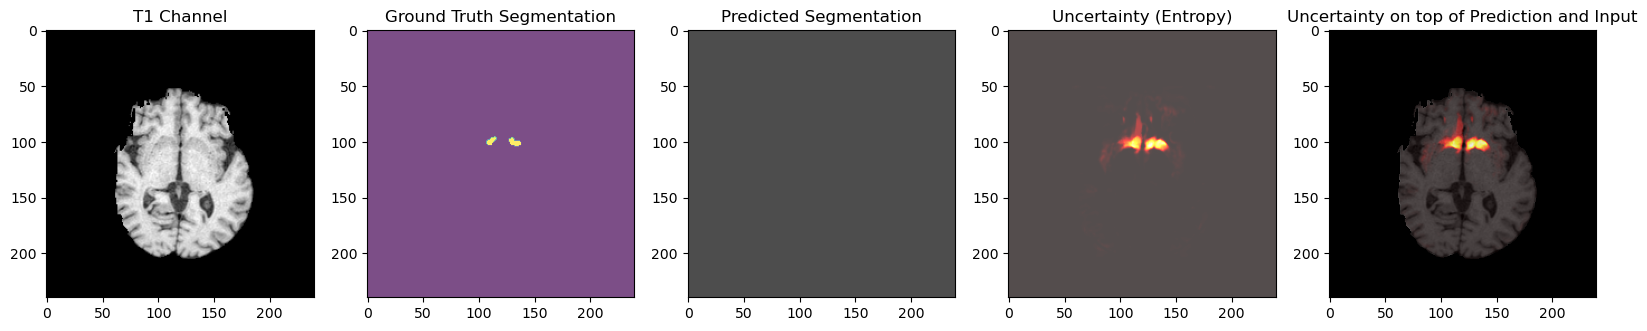

In [96]:
entropy_data, total_entropy = compute_entropy(tensor)
print("total_entropy:", total_entropy)
entropy_data = np.transpose(entropy_data, (1, 0, 2))

# Visualize uncertainty on a slice
slice_index = 67  # Choose a slice index for visualization

# Create a figure with five subplots
plt.figure(figsize=(20, 4))
labels = ['background', 'edema', 'necrosis', 'enhancing tumor']
colors = ['black',  'white',  'red', 'green']

cmap = ListedColormap(colors) # Define the colormap
# Choose the channel to visualize

# Visualize the input volume for the selected channel
plt.subplot(1, 5, 1)
plt.imshow(input_data[:, :, slice_index], cmap='gray')
plt.title(f'T1 Channel')

# Plot the segmentation
plt.subplot(1, 5, 2)
plt.imshow(segmentation_data[:, :, slice_index], cmap='viridis', alpha=0.7)
plt.title('Ground Truth Segmentation')

# Plot the prediction
plt.subplot(1, 5, 3)
plt.imshow(prediction_data[:, :, slice_index], cmap=cmap, alpha=0.7)
plt.title('Predicted Segmentation')

# Plot the uncertainty
plt.subplot(1, 5, 4)
plt.imshow(entropy_data[:, :, slice_index], cmap='hot', alpha=0.7)
plt.title('Uncertainty (Entropy)')

# Plot the uncertainty on top of the prediction and input data
plt.subplot(1, 5, 5)
# Set the alpha channel of uncertainty to zero where the background is black
alpha_channel = np.where(input_data[:, :, slice_index] == 0, 0, 0.7)
alpha_channel2 = np.where(prediction_data[:, :, slice_index] == 0, 0, 0.7)

plt.imshow(input_data[:, :, slice_index], cmap='gray')
plt.imshow(prediction_data[:, :, slice_index], cmap=cmap, alpha= alpha_channel2)
plt.imshow(entropy_data[:, :, slice_index], cmap='hot', alpha=alpha_channel)
plt.title('Uncertainty on top of Prediction and Input')
plt.show()

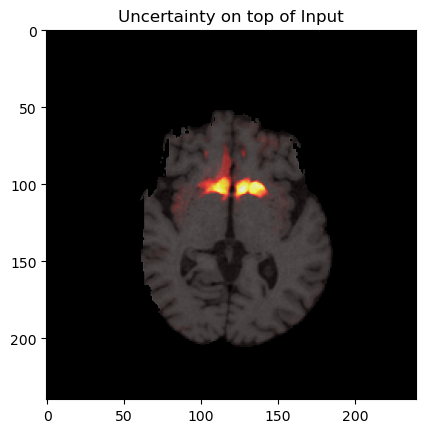

In [97]:
# Assuming you have defined alpha_channel as mentioned before
alpha_channel = np.where(input_data[:, :, slice_index] == 0, 0, 0.7)
plt.imshow(input_data[:, :, slice_index], cmap='gray')
plt.imshow(entropy_data[:, :, slice_index], cmap='hot', alpha=alpha_channel)
plt.title('Uncertainty on top of Input')
plt.show()

### Interactive Visualization

In [100]:
#     labels_dict = {"0": "background", "1": "edema", "2": "non-enhancing tumor", "3": "enhancing tumour"}

def plot_single_slice(file_name, slice_index, input_data, prediction_data, entropy_data):

    labels = ['background', 'edema', 'necrosis', 'enhancing tumor']
    colors = ['black',  'white',  'red', 'green']

    cmap = ListedColormap(colors) # Define the colormap

    fig, ax = plt.subplots(1, 3, figsize=(15, 7))

    ax[2].imshow(entropy_data[ :, :,slice_index], cmap='inferno')  # Using a colormap better suited for entropy
    ax[2].set_title(f'{file_name}')

    ax[1].imshow(prediction_data[ :, :,slice_index], cmap=cmap)
    ax[1].set_title('Segmentation')

    ax[0].imshow(input_data[ :, :,slice_index], cmap='gray')
    ax[0].set_title('Input')

    # Create a legend
    patches = [mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(labels)]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.suptitle(f'{file_name} - Slice {slice_index}', y=0.98)  # moving the title up slightly

    plt.show()

def plot_single_image(file_name, input_data, prediction_data, entropy_data):
    # Assuming that entropy_tensor is a 3D numpy array with shape (256, 256, 256)
    # or that load_image_data function is capable of reading it into this shape

    min_index = 0
    max_index = entropy_data.shape[2] - 1  # Changed to 0, assuming that entropy_tensor is 3D with shape (256, 256, 256)

    # Clear the output before displaying the new widget
    clear_output(wait=True)
    # Create interactive plot
    widget_instance = widgets.interact(
        plot_single_slice,
        file_name=widgets.fixed(file_name),
        slice_index=widgets.IntSlider(min=min_index, max=max_index, step=1, value=max_index // 2),
        entropy_data=widgets.fixed(entropy_data),  # Passed entropy_tensor here
        prediction_data=widgets.fixed(prediction_data),
        input_data = widgets.fixed(input_data),
        )

    display(widget_instance)




In [101]:
# Test the function
plot_single_image('Entropy Image', input_data, prediction_data, entropy_data)

interactive(children=(IntSlider(value=77, description='slice_index', max=154), Output()), _dom_classes=('widge…

<function __main__.plot_single_slice(file_name, slice_index, input_data, prediction_data, entropy_data)>